# Exercise sheet 11

# Exercise 1 - Multilevel tadpoles

Revisit the Reedfrog survival data from the course (reedfrogs) and add the predation and size treatment variables to the multi-level model. Consider models with either predictor alone, both predictors, as well as a model including their interaction. What do you infer about the causal influence of these predictor variables? Also focus on the inferred variation across tanks (the σ across tanks). Explain why it changes as it does across models with different predictors included.

In [1]:
library(rethinking)
data(reedfrogs)
d <- reedfrogs
d$pred <- as.integer(d$pred) - 1
d$big <- 3 - as.integer(d$size) - 1
d

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

density,pred,size,surv,propsurv,big
<int>,<dbl>,<fct>,<int>,<dbl>,<dbl>
10,0,big,9,0.9000000,1
10,0,big,10,1.0000000,1
10,0,big,7,0.7000000,1
10,0,big,10,1.0000000,1
10,0,small,9,0.9000000,0
10,0,small,9,0.9000000,0
10,0,small,10,1.0000000,0
10,0,small,9,0.9000000,0
10,1,big,4,0.4000000,1


In [2]:
model1 <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off,
		off ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1)		
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off, off ~ :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694847c574f8.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694847c574f8.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 1 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 40

See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off, off ~ :
"There were 677 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [3]:
model_pred <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off + offset_pred * pred,
		off ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		offset_pred ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off + offset_pred * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948400c3351.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948400c3351.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948400c

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  300 / 40

See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off + offset_pred * :
"There were 417 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [4]:
model_big <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off + offset_big * big,
		off ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		offset_big ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off + offset_big * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694829b95066.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694829b95066.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694829b95

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 7 Iteration:    1 / 40

See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off + offset_big * :
"There were 914 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [5]:
model_both <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off + offset_pred * pred + offset_big * big,
		off ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		offset_pred ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1),
		offset_big ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off + offset_pred * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694846294db4.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694846294db4.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69484629

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 7 Iteration:    1 / 40

See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off + offset_pred * :
"There were 832 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [6]:
model_inter <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off + offset_pred * pred + offset_big * big + offset_inter * big * pred,
		off ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		offset_pred ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1),
		offset_big ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1),
		offset_inter ~ dnorm(a_inter, sigma_inter),
		a_inter ~ dnorm(0, 1),
		sigma_inter ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off + offset_pred * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69485c03241.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69485c03241.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69485c0324

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:    1 

See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off + offset_pred * :
"There were 3965 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [7]:
compare(model1, model_pred, model_big, model_both, model_inter)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model_inter,1047.465,35.80618,0.000000,NA,3.801378,9.655043e-01
model_both,1054.129,35.76144,6.663916,5.911024,3.002623,3.449079e-02
model_pred,1071.859,34.26941,24.393321,10.755580,1.989179,4.873173e-06
model_big,1359.265,26.60639,311.799157,31.148406,2.029403,1.898574e-68
model1,1372.098,25.90651,324.632491,32.384082,1.035671,3.102448e-71


Okay, I'm somehow unhappy with our use of the multilevel models here. Lets try another approach.

In [8]:
d$pred <- d$pred + 1
d$big <- d$big + 1
d

density,pred,size,surv,propsurv,big
<int>,<dbl>,<fct>,<int>,<dbl>,<dbl>
10,1,big,9,0.9000000,2
10,1,big,10,1.0000000,2
10,1,big,7,0.7000000,2
10,1,big,10,1.0000000,2
10,1,small,9,0.9000000,1
10,1,small,9,0.9000000,1
10,1,small,10,1.0000000,1
10,1,small,9,0.9000000,1
10,2,big,4,0.4000000,2


```R
model_pred2 <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off_pred[pred],
		off_pred[pred] ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)
```

```R
model_big2 <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off_big[big],
		off_big[big] ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)
```

```R
model_both2 <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off_pred[pred] + off_big[big],
		off_pred[pred] ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1),
		off_big[big] ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)
```

```R
model_inter2 <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off_pred[pred] +
		off_big[big] +
		off_inter_pred_big * (pred - 1) * (big - 1) +
		off_inter_pred * (pred - 1) * (2 - big) +
		off_inter_big * (2 - pred) * (big - 1) +
		off_inter * (2 - pred) * (2 - big),
		off_pred[pred] ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1),
		off_big[big] ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1),
		off_inter_pred_big ~ dnorm(a_inter, sigma_inter),
		off_inter_pred ~ dnorm(a_inter, sigma_inter),
		off_inter_big ~ dnorm(a_inter, sigma_inter),
		off_inter ~ dnorm(a_inter, sigma_inter),
		a_inter ~ dnorm(0, 1),
		sigma_inter ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)
```

```R
compare(model1, model_pred, model_big, model_both, model_inter, model_pred2, model_big2, model_both2, model_inter2)
compare(model1, model_pred2, model_big2, model_both2, model_inter2)
compare(model_inter, model_inter2, model_both, model_both2)
compare(model_inter, model_inter2)
```

We can see that the interaction model has the best WAIC, and is weighted the highest. We will use it for our further discussion.

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]


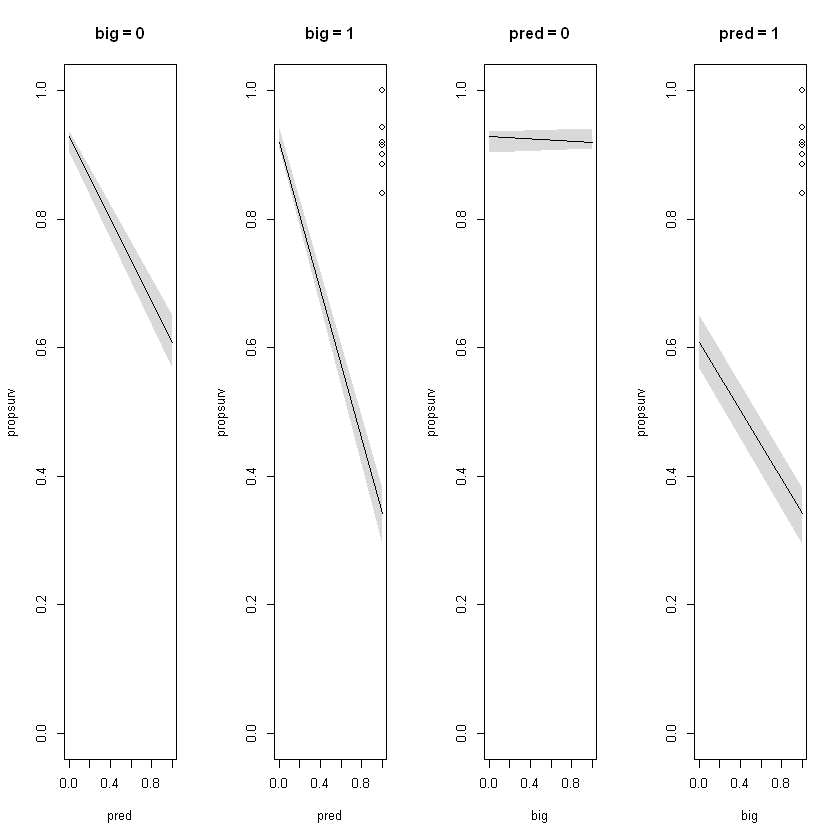

In [14]:
# Sampling the posterior for each of the four cases
post_inter <- extract.samples(model_inter)
link_inter <- function(pred, big) post_inter$off + post_inter$offset_pred * pred + post_inter$offset_big * big + post_inter$offset_inter * big * pred

# Making four contrafactual plots
par(mfrow=c(1,4))
my_seq = c(0,1)
for (big in my_seq) {
	dt <- d[d$big == big, ] 
	plot(propsurv ~ pred, data=dt, xlim=c(0, 1), ylim=c(0, 1), 
	xlab="pred")
	title(paste("big =", big))
	mu <- link(model_inter , data=list(pred = my_seq, big = big)) 
	mu.mean <- apply(mu, 2, mean) 
	mu.HPDI <- apply(mu, 2, HPDI, prob=0.91) 
	lines(0:1, mu.mean ) 
	shade(mu.HPDI, my_seq)
}
for (pred in my_seq) {
	dt <- d[d$pred == pred, ] 
	plot(propsurv ~ big, data=dt, xlim=c(0, 1), ylim=c(0, 1), 
	xlab="big")
	title(paste("pred =", pred))
	mu <- link(model_inter , data=list(big = my_seq, pred = pred)) 
	mu.mean <- apply(mu, 2, mean) 
	mu.HPDI <- apply(mu, 2, HPDI, prob=0.91) 
	lines(0:1, mu.mean ) 
	shade(mu.HPDI, my_seq)
}

So the plots tell us the following:
1. Including predators in a small tank reduces the probability of survival dramatically.
2. In a big tank it reduces the probability even more.
3. Without predators, the chance of survival is around the same for both sizes of tank.
4. With predators, we can see that the change from a small to a big tank reduces the chance of survival.

[1] 1.1702426 1.2454358 1.0809658 2.4502126 2.5774935 3.1157317 1.1016926
 [8] 2.7658507 2.3052755 0.9287831 2.0889955 1.1750024

[1] 2.073773 2.506370 2.279854 4.041568 4.742284 7.731427 2.404112 5.379250
 [9] 6.706409 1.700143 4.525572 2.453212

[1] "sigma"       "sigma"       "sigma_big"   "sigma"       "sigma_pred" 
 [6] "sigma"       "sigma_big"   "sigma_pred"  "sigma"       "sigma_big"  
[11] "sigma_pred"  "sigma_inter"

[1] "grey"   "blue"   "blue"   "red"    "red"    "violet" "violet" "violet"
 [9] "purple" "purple" "purple" "purple"

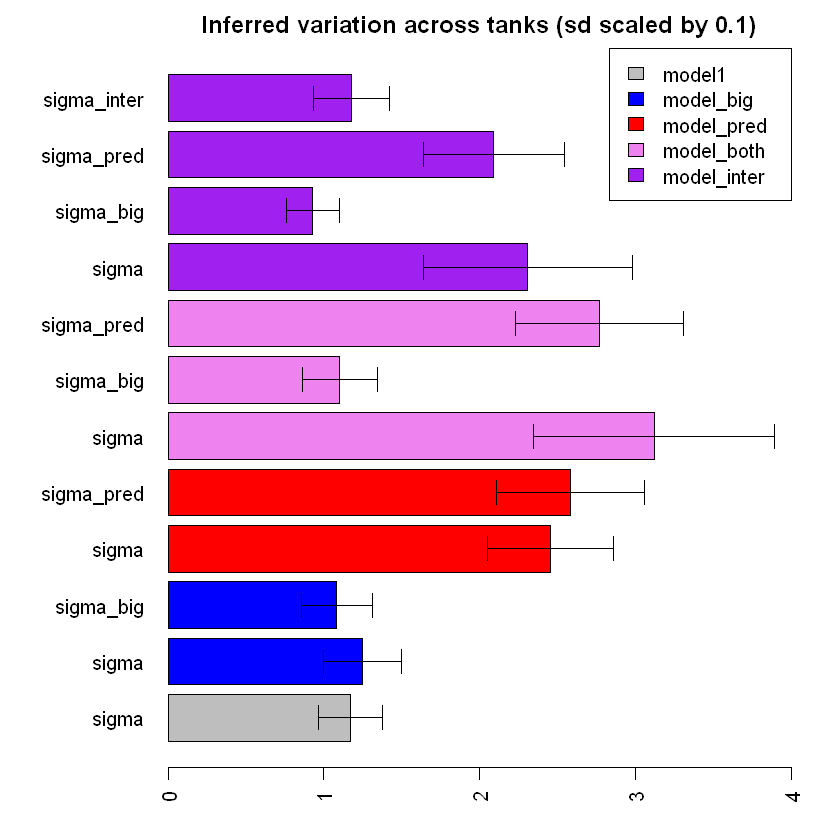

In [54]:
post1 <- extract.samples(model1)
post_big <- extract.samples(model_big)
post_pred <- extract.samples(model_pred)
post_both <- extract.samples(model_both)
post_inter <- extract.samples(model_inter)

posteriors <- list(
	list(post = post_big, name = "model_big", col = "blue"),
	list(post = post_pred, name = "model_pred", col = "red"),
	list(post = post_both, name = "model_both", col = "violet"),
	list(post = post_inter, name = "model_inter", col = "purple")
)
sigma_means <- c(mean(post1$sigma))
sigma_sds <- c(sd(post1$sigma))
names <- c("sigma")
cols <- c("grey")

model_names <- c("model1")
model_cols <- c("grey")

for (pac in posteriors) {
	post <- pac$post
	model_names <- append(model_names, pac$name)
	col <- pac$col
	model_cols <- append(model_cols, col)
	if (any(names(post) == "sigma")) {
		sigma_means <- append(sigma_means, mean(post$sigma))
		sigma_sds <- append(sigma_sds, sd(post$sigma))
		names <- append(names, "sigma")
		cols <- append(cols, col)
	}
	if (any(names(post) == "sigma_big")) {
		sigma_means <- append(sigma_means, mean(post$sigma_big))
		sigma_sds <- append(sigma_sds, sd(post$sigma_big))
		names <- append(names, "sigma_big")
		cols <- append(cols, col)
	}
	if (any(names(post) == "sigma_pred")) {
		sigma_means <- append(sigma_means, mean(post$sigma_pred))
		sigma_sds <- append(sigma_sds, sd(post$sigma_pred))
		names <- append(names, "sigma_pred")
		cols <- append(cols, col)
	}
	if (any(names(post) == "sigma_inter")) {
		sigma_means <- append(sigma_means, mean(post$sigma_inter))
		sigma_sds <- append(sigma_sds, sd(post$sigma_inter))
		names <- append(names, "sigma_inter")
		cols <- append(cols, col)
	}
}

sigma_mean
sigma_sd
namings
cols

scale <- 1.2
offset <- 0.5
sd_scale <- 0.1

par(mar = c(3, 7, 2, 2))
bp <- barplot(sigma_means, names.arg = names, las=2, xpd = FALSE, horiz = TRUE, col = cols, xlim = c(0, 4.0))
arrows(sigma_means + sigma_sds * sd_scale, (1:length(sigma_means)) * scale - offset, sigma_means - sigma_sds * sd_scale, (1:length(sigma_means)) * scale - offset, angle = 90, code = 3, length = 0.1, col = "black")
title(paste("Inferred variation across tanks ", "(sd scaled by ", sd_scale, ")", sep = ""))
legend("topright", model_names, fill = model_cols)